# Week 2B: Accessing data from Reddit

## Overview

Reddit is an online bulletin board system to host user-generated content; text, image, video, and audio `posts`. It is categorized into `subreddits` which are communities or user-groups meant to serve as a bulletin board on a specific topic or for a specific group of people. The users can `comment` on posts, which can then be `upvoted` or `downvoted` by other users. Each subreddit is moderated by `moderators` who try to enforce community rules to the comments and discussion therein.

## APIs

There are two APIs that are widely used to scrape data from Reddit
- Reddit API (https://www.reddit.com/dev/api/) - This is the most detailed API with endpoints that can enable us to find almost anything on Reddit. There is a Python wrapper, `praw`,  that helps us access this API (https://praw.readthedocs.io/en/stable/index.html). 
- Pushshift API (https://www.reddit.com/r/pushshift/comments/bcxguf/new_to_pushshift_read_this_faq/) - Pushshift is a big-data storage and analytics project that enables access to the Reddit data albeit with some delay related to specific content (e.g, editing of comments might not be included instantly). It allows us to process data before accessing it, e.g., counting comments by specific users. In a raw Reddit API, we will need to do it locally, while Pushshift API enables us to do this without the hassle of downloading data. There is a Python wrapper, `psaw`, that helps us access Reddit data easily using Pushshit API (https://pypi.org/project/psaw/). Pushshift can be less stable than the pure Reddit API because it is a third-party application.

In this exercise, we will use `praw`, because when Andrew tested `psaw` this weekend it wasn't working. 

In [1]:
%%capture
# We call the Python package manager pip to install the praw package
# Using ! in ipython notebook runs the command in the bash shell and not in the python; try running !ls in a new cell
!pip install --upgrade praw

### Querying Pushshift API using Python


There are several parameters that can be passed to this search query. We will work through some of those parameters in this notebook. From here on, we will make use of `psaw` API. 

In [2]:
import pandas as pd
import praw


To use `praw` you need a Reddit user account. The startup instructions are here: https://praw.readthedocs.io/en/stable/getting_started/quick_start.html

Once you have a user account, and have made a `script` type app. Add your client secret, username, and user agent to a local json file using the code below. JSON is a file format which is very similar to a dictionary in Python, making it ideal for saving this sort of information. It is also easy to read and write.

This code creates a file on your computer with your login info. Do NOT share this file. This way, when you share the code, your account is safe. Anyone else could only run the code if they have their own login.

In [3]:
import json

# Fill this out with your own info, then delete your info and comment it out once you have the file on your local machine.

secret =   {'client_id':"", #this should be right under the words 'personal use script'
            'client_secret':"", # this should be next to the word 'secret'
            'password':"", # this is your reddit password
            'user_agent':"testscript by u/username", # this is a description of the project
            'username':"", # this is your reddit username
           } 
 
with open("secret.json", "w") as f:
    json.dump(secret, f)

In [4]:
# Read your secret dictionary in from the file

with open("secret.json", "r") as f:
    secret = json.load(f)

In [5]:
# Use your secret dictionary to fill out the login info

reddit = praw.Reddit(
    client_id = secret['client_id'],
    client_secret = secret['client_secret'],
    username = secret['username'],
    password = secret['password'],
    user_agent = secret['user_agent']
)

If the login worked, the cell below should print out your username:

In [6]:
print(reddit.user.me())

None


As a precaution, we are setting read-only to True. Otherwise you can accidentally post to Reddit with your script.

In [7]:
reddit.read_only = True

<div class="alert alert-info">

**Exercise 0.1:** We are going to start with collecting the 100 hottest posts on Reddit from the subreddit Ask me Anything (IAmA; https://www.reddit.com/r/AMA/) and filtering for posts with more than 100 upvotes:
</div>

In [8]:
# To access a particular subreddit, use the .subreddit method of your reddit instance
# and pass in the name of the subreddit as the argument

subreddit = reddit.subreddit("AMA")

The `subreddit` object has several methods for getting posts; controversial, gilded, hot, new, rising, and top. For each of them, you can call the method and the number of responses you want.

The API returns a generator object, which is an iterator over the list. We can only access the elements of this list through iteration in a sequential manner, i.e, we can not index on this generator like `posts[0]`. You can convert generators to lists, but be careful of having enough memory available if you try to do so.

In [9]:
for post in subreddit.hot(limit=100):
    if (post.score > 100) and not (post.over_18):
        # Output: the post's title
        print(post.title)
        # Output: the post's score        
        print(post.score)
        # Output: the URL the submission points to or the submission's URL if it's a self post
        print(post.url)

ResponseException: received 401 HTTP response

<div class="alert alert-info">

**Exercise 0.2:** Make a pandas dataframe of the entries returned by the API
</div>

The code below is a list comprehension that loops through the generator and extracts relevant data for each matching Reddit post. It then turns that list into a Pandas DataFrame.

Note: Each element of `posts` is of type `praw.models.submission` which is a special object. You will want the `vars()` function to convert it to a dict.

In [75]:
list_of_posts = [vars(p) for p in subreddit.hot(limit=100)]

df_posts = pd.DataFrame(list_of_posts)


<div class="alert alert-info">

**Exercise 0.3:** Now check for yourself the following - 

1. Number of rows and columns in the resulting dataframe 
2. The list of fieldnames that are returned by the API
</div>

In [11]:
# Shape of the data frame

In [10]:
# Which attributes do we now have access to?


### Exercise 1: Extracting texts from Reddit posts

<div class="alert alert-info">

**Exercise 1.1:** Let's now collect submissions in the `news` subreddit
- access the news subreddit and create an iterator of the most recent 1000 posts
- check if the post contains a keyword of your choice in either the title or body of the post
- make a dataframe where each row consists of a single entry returned by the API. 
- check the number of rows and columns in the resulting dataframe
</div>




In [84]:
subreddit = ?

In [102]:
keyword = ?

submissions_list = []

# You'll want a for loop here

    # With a condition to test for the keyword
        
        # Then add the success cases to the list as dicts
        
df_posts = pd.DataFrame(submissions_list)

Navy SEAL deserter killed in Ukraine, official says
Ukraine: US and European countries pledge heavy weapons
Medvedev warns of nuclear war if Russia defeated in Ukraine | Russia-Ukraine war News
Ukraine war: Ukraine admits retreat from front line town of Soledar
Berlin Won’t Allow Exports of German Tanks to Ukraine Unless U.S. Sends Its Own
Ukraine crash: Ministers killed as helicopter comes down near nursery
Organizers ban Russian, Belarusian flags from Australian Open site after Ukraine's ambassador to Australia condemns Russian flag display | CNN
UK to supply tanks; Russian missiles hit across Ukraine
Russia fires new waves of missiles at Ukraine and hits energy infrastructure
Rishi Sunak offers tanks to Ukraine to help ‘push Russian troops back’
Ukraine war latest: UK will provide Challenger 2 tanks to Ukraine - Sunak - BBC News
'Land covered in corpses' as Russia strives for first big Ukraine gains in months
Ukraine denies Russian claim it killed 600 soldiers
US to send Ukraine doz


<div class="alert alert-info">

**Exercise 1.2:** Let's look at some of the columns 
- have a look at the titles, number of comments, and the created timestamp
- Can you interpret the date column? Head over to https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html and use `pd.to_datetime` for conversion of this column to an appropriate human-readable format. 

</div>

In [12]:
# Print out the three columns we are interested in

The timestamp column is not interpretable to people, but this is a common format that is shared across the systems in the world. Let's convert this to a time that humans can read. 

In [14]:
# Convert the timestamp column to a datetime

In [13]:
# Print it out again to see if it worked


<div class="alert alert-info">

**Exercise 1.3:** How would you list the usernames of the posters?

</div>


In [15]:
list_usernames = ?
print(list_usernames)

SyntaxError: invalid syntax (2494137333.py, line 1)

### Exercise 2: Accessing Comments in Reddit

The comments are accessible via the praw method `praw.models.submission.comments`. This returns a `CommentForest`, which lets you know which comments respond to which previous comments by having the struture of a tree.

<div class="alert alert-info">

**Exercise 2.1:** Find the hottest post on the `london` subreddit right now. Do the following afterwards - 
- Access the comments CommentForest
- Use the more_comments() method to access all the top level comments
- Store the comments to a DataFrame
</div>



In [119]:
# Replace the old subreddit object
subreddit = ?

# Get just the top post
top_post = 

In [122]:
# What is the title of the top post? Does this match what you see on Reddit?

'‘The damage is immeasurable’: Woman breaks into Jewish temple, desecrates sanctuary and Torah, then returns to scare children, prosecutors say'

In [125]:
# Because there can be many comments, Reddit returns a MoreComments object sometimes instead of actual comments
# If you see such an object, it is a placeholder telling you that you can ask for more comments to be added
# You do this by calling more_comments() on the CommentForest

# praw recommends a while loop here, so I've helped you a bit

# First you need a condition to check
# while loops run until this condition is false
more_to_replace = True
while more_to_replace:
    # Inside the loop, do whatever it is you want to repeat
    ?
    # Be sure to also update your condition each loop so that it knows when to stop
    more_to_replace = ?

Here are a few demo while loops to help you figure them out:

In [ ]:
# initialize loop
x = 1
while x < 5:
    # do something
    print(x)
    # update condition
    x = x + 1

[10, 5.0, 16.0, 8.0, 4.0, 2.0, 1.0]

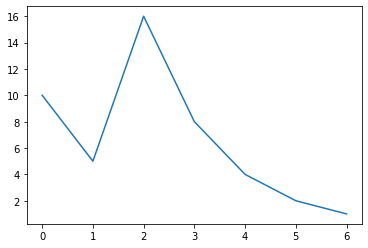

In [24]:
import matplotlib.pyplot as plt

# while loops are often used for iteration when you don't know how much iterating you will do
# this function takes a number and either multiplies by 3 and adds 1 if it is odd, or divides by 2 if even
# it repeats until the output is 1
# (https://en.wikipedia.org/wiki/Collatz_conjecture)

def collatz_tester(number):
    # I want to keep track of each number I've visited
    nums_so_far = []
    # Keep iterating until I reach 1
    while (number != 1):
        # Add the latest number to the list
        nums_so_far.append(number)
        # Update according to my rule
        if (number%2 == 0):
            number = number/2
        else:
            number = 3 * number + 1
        # Safety valve in case something bad happens
        if (len(nums_so_far) > 1000):
            print("Took too long to finish")
            break
    nums_so_far.append(number)
    plt.plot(nums_so_far)
    return nums_so_far

collatz_tester(10)

In [25]:
# turn the comments into a DataFrame
comments = pd.DataFrame()

<div class="alert alert-info">

**Exercise 2.2:** Let's look at the content of the comments
- Check which key of the entries contain the content of the comments
- have a look at the replies, score and text of the comments
</div>


In [27]:
# Print ten entires from the DataFrame with their score, body, and a list of comments replying to them


### Exercise 3: Accessing User data in Reddit

<div class="alert alert-info">

**Exercise 3.1:** Find comments made by a user `nasa`: limit the query to 1000 entries. 
- Make a dataframe of the entries returned by the API
- convert `created_utc` to a human-readable format
- count the number of comments that `nasa` made on each subreddit. checkout https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html to do so.
</div>

In [182]:
user = reddit.redditor(?)
df_user_comments = pd.DataFrame([vars(c) for c in ?])
df_user_comments['created_utc'] = pd.to_datetime(df_user_comments['created_utc'], utc=True, unit='s')


In [28]:
# Use value counts to see which subreddits nasa frequents


## Homework: Subreddits of users that posts about OII


<div class="alert alert-info">

- Write a function `subreddit_of_user` that takes in a string input `username` and returns a `list` of unique subreddits on which that `username` comments. 
- Find five posts with score `>10` that contain the keywords - "Oxford Internet Institute" 
- Find out the list of unique authors in the entries returned above
- call `subreddit_of_user` on each of the authors found above
</div>



In [189]:
# Your function here:
# Hint: if you are getting a Forbidden error, you may need to use try: except:
# Some subreddits are private, and trying to read them will give you an error

def subreddits_of_user(username):
    '''
    Takes a reddit username and returns a list of the subreddits they have posted on recently
    '''
    return user_comments_subreddits


In [186]:
search_result = reddit.subreddit("all").search("Oxford Internet Institute")
# convert to a dataframe - remember to filter for posts with scores > 10
df_posts_oii = pd.DataFrame()

# get just the author data
list_of_usernames = ?

In [187]:
# print out the authors
list_of_usernames

1     AlgorandFoundation
2                 cysec_
8                 hoyeto
9              agecosmos
13                hargup
14                iRoost
15                HaHard
18                  mvea
19     NutritionResearch
24     fantastic_comment
29          streamingcat
33           PrivacyDude
34     okwherearemypants
48             digitaled
53    labourresearchproj
90           MoonBunnyMB
96           Cianobaxter
97            missbp2189
Name: author, dtype: object

In [190]:
# use a for loop to print out the subreddits of the users who post about the OII
for user in list_of_usernames:
    ?

AlgorandFoundation
[]
cysec_
[Subreddit(display_name='AlgorandOfficial'), Subreddit(display_name='algorand'), Subreddit(display_name='Tinyman')]
hoyeto
[Subreddit(display_name='NoShitSherlock'), Subreddit(display_name='MTFSelfieTrain'), Subreddit(display_name='EnoughMuskSpam'), Subreddit(display_name='Buttcoin'), Subreddit(display_name='CryptoReality'), Subreddit(display_name='nottheonion'), Subreddit(display_name='Physics'), Subreddit(display_name='science'), Subreddit(display_name='blendermemes'), Subreddit(display_name='bimbofication'), Subreddit(display_name='SonyAlpha'), Subreddit(display_name='CryptoCurrency'), Subreddit(display_name='blender')]
agecosmos
[Subreddit(display_name='FragrantHarbour'), Subreddit(display_name='ADVChina'), Subreddit(display_name='fucktheccp'), Subreddit(display_name='China_irl'), Subreddit(display_name='CCP_virus'), Subreddit(display_name='interestingasfuck'), Subreddit(display_name='real_China_irl'), Subreddit(display_name='taiwan'), Subreddit(display

<div  class="alert alert-danger">
    <b>Additional Info:</b>
    Last year the course used the Pushshift API instead of the standard Reddit API. I have copied the old material below in case your final project involves Reddit and you want to try Pushshift. In my own testing, it DID NOT WORK, so if you go this direction expect things to get messy.
</div>

### Pushshift API

There are two ways to access this API 
- Plain API through https://api.pushshift.io/.  
- (advanced) Elasticsearch search engine through https://elastic.pushshift.io/. This search engine is designed for fast aggregation and query on big-data. 

The full API is documented here https://github.com/pushshift/api. However, in this exercise, we will learn how to use the plain API through https://api.pushshift.io/ and `psaw`. 

### Querying Pushshift API manually

To use the Pushshift API, we need to know the endpoints that are accessible. Each endpoint serves a specific purpose. There are two endpoints available for this API:
- `/reddit/search/comment` to search for comments
- `/reddit/search/submission` to search for posts

Thus, for example, if we need to search for comments, they can be accessed via https://api.pushshift.io/reddit/search/comment. 

Once we have the correct address, we need a query to search the database. Any data that is sent to an API is included only after a `?` in the URL link. For example, if we need to look up submissions that have word "science" in them, our query will look like:

```
https://api.pushshift.io/reddit/search/submission/?q=science
```

If we click on the above link or copy and paste the above link in any browser, we will see a JSON response from this enddpoint giving us 25 (by default) most recent posts containing the word "science". Each post is in the form of key-value pair. An example response of a post is as follows:

        {
            "all_awardings": [],
            "allow_live_comments": false,
            "author": "Own_Professional_190",
            "author_flair_css_class": null,
            "author_flair_richtext": [],
            "author_flair_text": null,
            "author_flair_type": "text",
            "author_fullname": "t2_jaz08fd5",
            "author_is_blocked": false,
            "author_patreon_flair": false,
            "author_premium": false,
            "awarders": [],
            "can_mod_post": false,
            "contest_mode": false,
            "created_utc": 1644227451,
            "domain": "self.UToledo",
            "full_link": "https://www.reddit.com/r/UToledo/comments/smmgy3/questions_about_transferring/",
            "gildings": {},
            "id": "smmgy3",
            "is_created_from_ads_ui": false,
            "is_crosspostable": true,
            "is_meta": false,
            "is_original_content": false,
            "is_reddit_media_domain": false,
            "is_robot_indexable": true,
            "is_self": true,
            "is_video": false,
            "link_flair_background_color": "",
            "link_flair_richtext": [],
            "link_flair_text_color": "dark",
            "link_flair_type": "text",
            "locked": false,
            "media_only": false,
            "no_follow": true,
            "num_comments": 0,
            "num_crossposts": 0,
            "over_18": false,
            "permalink": "/r/UToledo/comments/smmgy3/questions_about_transferring/",
            "pinned": false,
            "retrieved_on": 1644227461,
            "score": 1,
            "selftext": "Hi, \n\nI am an international student looking for universities to transfer. I heard that Toledo is known for its engineering program and co-op program. I am interested in computer science and data science. Can anybody tell me about general thoughts on university life at Toledo? It can include anything - reputation, class experience, dorm life, life outside of university, and so on. \n\nThank you in advance and stay safe :D",
            "send_replies": true,
            "spoiler": false,
            "stickied": false,
            "subreddit": "UToledo",
            "subreddit_id": "t5_2wpwg",
            "subreddit_subscribers": 182,
            "subreddit_type": "public",
            "thumbnail": "self",
            "title": "Questions about transferring",
            "total_awards_received": 0,
            "treatment_tags": [],
            "upvote_ratio": 1.0,
            "url": "https://www.reddit.com/r/UToledo/comments/smmgy3/questions_about_transferring/"
        }

There are many ways to query this API. Head over to https://github.com/pushshift/api#search-parameters-for-comments to check the paramaters that you can pass to the API to enhance your queries.


### Understanding the JSON response

Here are a few keys returned by the API and what they mean. Most of them are self-explanatory, and which ones are needed will depend heavily on the specific use cases. 

----

| **Key**        	|   	| **Description**                                               	|
|----------------	|---	|---------------------------------------------------------------	|
| _url_          	|   	| url of the `post` or `comment`                                	|
| _author_       	|   	| username of the redditor who created this `post` or `comment` 	|
| _created_utc_  	|   	| time in UTC when this `post` or `comment` was created         	|
| _subreddit_    	|   	| `subreddit` on which this `post` or `comment` was created     	|
| _title_        	|   	| title of the `post`                                           	|
| _selftext_     	|   	| content of the `post` or the `comment`                        	|
| _retrieved_on_ 	|   	| time in UTC when this data was extracted by the Pushshift API 	|

----